In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('K-Means & Hirarchical Clustering/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [2]:
print(data.isna().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [3]:
#Label encoding
label_encoding = LabelEncoder()
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col] = label_encoding.fit_transform(data[col])

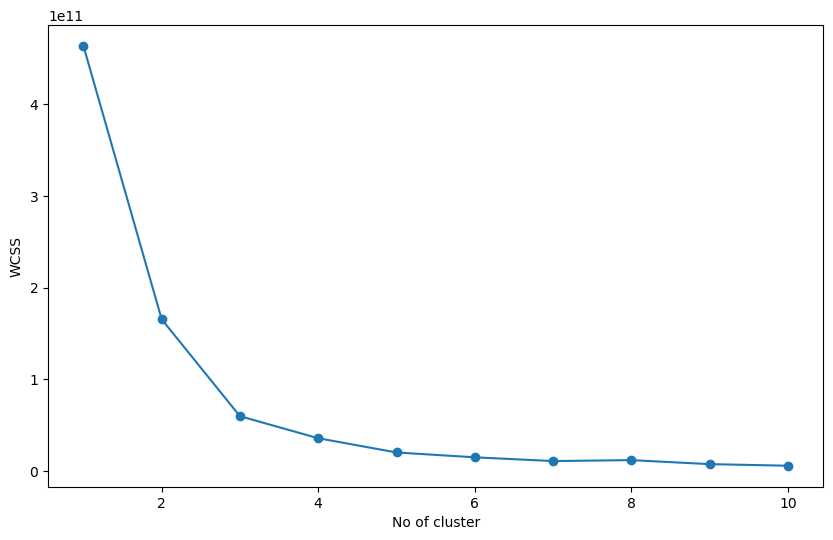

In [4]:
#Apply Kmeans clustering
x = data[['EstimatedSalary']]

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data[['EstimatedSalary']])
    wcss.append(kmeans.inertia_)

#Plot elbow graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('No of cluster')
plt.ylabel('WCSS')
plt.show()

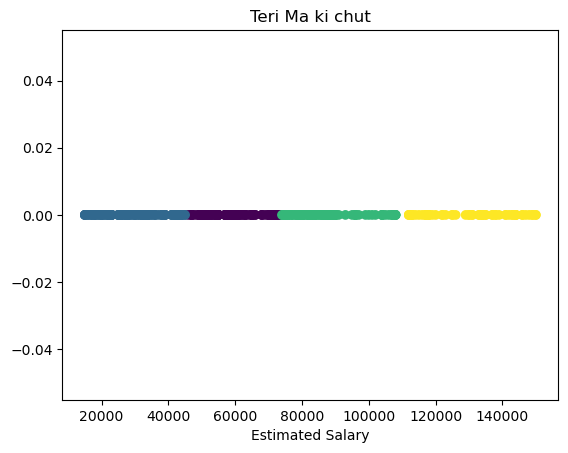

In [5]:
#clusters = 4
kmeans = KMeans(n_clusters=4,random_state=42)
data['cluster'] = kmeans.fit_predict(x)

#visulaize the graph
plt.scatter(data['EstimatedSalary'], len(data)*[0], c=data['cluster'], cmap='viridis')
plt.xlabel('Estimated Salary')
plt.title("Teri Ma ki chut")
plt.show()